### Make OpenEO connection

In [19]:
import openeo

#token for METEO
#connection_terra = openeo.connect("openeo.vito.be").authenticate_oidc()

#token SENTINEL
connection = openeo.connect("https://openeofed.dataspace.copernicus.eu/").authenticate_oidc()

Authenticated using refresh token.


In [22]:
#Get desired data
from preprocessing import worldcereal_preprocessed_inputs

EXTENT = dict(zip(["west", "south", "east", "north"], [5.19, 51.25, 5.21, 51.26]))
EXTENT['crs'] = "EPSG:4326"

STARTDATE = '2020-11-01'
ENDDATE = '2021-10-31'

# Set OpenEO classification UDF context based on settings
CONTEXT = {
    "startdate": STARTDATE,  # Required
    "enddate": ENDDATE,      # Required
}



input_cube = worldcereal_preprocessed_inputs(
     connection = connection,
     bbox = EXTENT,
     start = STARTDATE,
     end = ENDDATE,
     METEO_collection="AGERA5",
     S2_collection= "SENTINEL2_L2A",
     S1_collection= "SENTINEL1_GRD",
     DEM_collection= "COPERNICUS_30"
)

#agera5_cube = worldcereal_preprocessed_inputs(
#     connection = connection_terra,
#     bbox = EXTENT,
#     start = STARTDATE,
#     end = ENDDATE,
#     METEO_collection="AGERA5",
#     S2_collection= None,
#     S1_collection= None,
#     DEM_collection= None
#)

#agera5_cube = connection_terra.load_collection(
#        "AGERA5",
#        spatial_extent=EXTENT,
#        bands=["temperature-mean", "precipitation-flux"],
#        temporal_extent=[STARTDATE, ENDDATE],
#    )

input_cube.execute_batch(outputfile = 'test.nc',
                        description='world cereal data collection',
                        job_options={"split_strategy": "crossbackend"})


Preflight process graph validation raised: [InternalValidationFailure] Validation failed: BackendLookupFailureException(status_code=400, code='BackendLookupFailure', message="Collections across multiple backends ({'cdse', 'terrascope'}): {'COPERNICUS_30', 'SENTINEL2_L2A', 'SENTINEL1_GRD', 'AGERA5'}.", id='r-24051536a816438ebace84c022cdb826')


0:00:00 Job 'agg-pj-20240515-101812': send 'start'
0:01:09 Job 'agg-pj-20240515-101812': running (progress 0%)
0:01:19 Job 'agg-pj-20240515-101812': running (progress 0%)
0:01:31 Job 'agg-pj-20240515-101812': running (progress 0%)
0:01:42 Job 'agg-pj-20240515-101812': running (progress 0%)
0:01:57 Job 'agg-pj-20240515-101812': running (progress 0%)
0:02:15 Job 'agg-pj-20240515-101812': running (progress 0%)
0:02:34 Job 'agg-pj-20240515-101812': running (progress 0%)
0:03:01 Job 'agg-pj-20240515-101812': running (progress 0%)
0:03:29 Job 'agg-pj-20240515-101812': running (progress 0%)
0:04:03 Job 'agg-pj-20240515-101812': running (progress 0%)
0:04:46 Job 'agg-pj-20240515-101812': running (progress 25%)
0:05:45 Job 'agg-pj-20240515-101812': running (progress 25%)
0:06:47 Job 'agg-pj-20240515-101812': running (progress 25%)
0:08:01 Job 'agg-pj-20240515-101812': running (progress 25%)
0:09:10 Job 'agg-pj-20240515-101812': running (progress 25%)
0:10:14 Job 'agg-pj-20240515-101812': runnin

OpenEoApiError: [500] Internal: Server error: KazooTimeoutError('Connection time-out') (ref: r-240515e716d34d9b9e8f1481ece911f9)

In [11]:
from pathlib import Path

# download the agera 5 cube
result_dir = Path.cwd()
job = agera5_cube.create_job(
    out_format="GTIFF",
)
job.start_and_wait()

job.get_results().download_files(result_dir)

#create a STAC collection from th eobtained cube
result_metadata = job.get_results()
job_url, = [k["href"] for k in result_metadata.get_metadata()["links"] if k["rel"] == "canonical"]
load_stac_cube = s2_cube.load_stac(job_url)

#merge the cubes and download
input_cube = s2_cube.merge_cubes(load_stac_cube)




0:00:00 Job 'j-24051575983946539c6694814f39164e': send 'start'
0:00:30 Job 'j-24051575983946539c6694814f39164e': queued (progress 0%)
0:00:36 Job 'j-24051575983946539c6694814f39164e': queued (progress 0%)
0:00:44 Job 'j-24051575983946539c6694814f39164e': queued (progress 0%)
0:00:53 Job 'j-24051575983946539c6694814f39164e': queued (progress 0%)
0:01:03 Job 'j-24051575983946539c6694814f39164e': queued (progress 0%)
0:01:19 Job 'j-24051575983946539c6694814f39164e': queued (progress 0%)
0:01:35 Job 'j-24051575983946539c6694814f39164e': queued (progress 0%)
0:01:55 Job 'j-24051575983946539c6694814f39164e': running (progress N/A)
0:02:19 Job 'j-24051575983946539c6694814f39164e': running (progress N/A)
0:02:52 Job 'j-24051575983946539c6694814f39164e': running (progress N/A)
0:03:29 Job 'j-24051575983946539c6694814f39164e': running (progress N/A)
0:04:16 Job 'j-24051575983946539c6694814f39164e': running (progress N/A)
0:05:24 Job 'j-24051575983946539c6694814f39164e': running (progress N/A)
0:

AttributeError: 'DataCube' object has no attribute 'load_stac'

In [11]:
from datetime import datetime
current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%Y_%m_%d_%H_%M_%S")
outputfile_name = str(formatted_datetime) + '_input_cube_worldCereal.nc'

input_cube.execute_batch(outputfile = outputfile_name,
                        description='world cereal data collection')

Preflight process graph validation raised: [CollectionNotFound] Collection 'AGERA5' does not exist.


0:00:00 Job 'j-2405155e702e4218aa9dfac9671faaff': send 'start'
0:00:16 Job 'j-2405155e702e4218aa9dfac9671faaff': created (progress 0%)
0:00:22 Job 'j-2405155e702e4218aa9dfac9671faaff': running (progress N/A)
0:00:28 Job 'j-2405155e702e4218aa9dfac9671faaff': running (progress N/A)
0:00:36 Job 'j-2405155e702e4218aa9dfac9671faaff': running (progress N/A)
0:00:47 Job 'j-2405155e702e4218aa9dfac9671faaff': running (progress N/A)
0:01:00 Job 'j-2405155e702e4218aa9dfac9671faaff': running (progress N/A)
0:01:16 Job 'j-2405155e702e4218aa9dfac9671faaff': running (progress N/A)
0:01:35 Job 'j-2405155e702e4218aa9dfac9671faaff': error (progress N/A)
Your batch job 'j-2405155e702e4218aa9dfac9671faaff' failed. Error logs:
[{'id': '[1715756877175, 557437]', 'time': '2024-05-15T07:07:57.175Z', 'level': 'error', 'message': 'OpenEO batch job failed: CollectionNotFoundException(status_code=404, code=\'CollectionNotFound\', message="Collection \'AGERA5\' does not exist.", id=\'no-request\')'}]
Full logs can

JobFailedException: Batch job 'j-2405155e702e4218aa9dfac9671faaff' didn't finish successfully. Status: error (after 0:01:37).

In [3]:

current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%Y_%m_%d_%H_%M_%S")
outputfile_name = str(formatted_datetime) + '_output_worldcereal.nc'

udf = openeo.UDF.from_file("udf_worldcereal_inference.py")

prediction = input_cube.apply_neighborhood(
    process=udf,
    size=[
        {"dimension": "x", "value": 100, "unit": "px"},
        {"dimension": "y", "value": 100, "unit": "px"},
    ],
    overlap=[
        {"dimension": "x", "value": 0, "unit": "px"},
        {"dimension": "y", "value": 0, "unit": "px"},
    ],
)

prediction = prediction.rename_labels(dimension="bands",target= ["output_catboost"])

prediction.execute_batch(outputfile = outputfile_name,
                        description='world cereal inference',
                        job_options={'driver-memory': '4g',
                                    'executor-memoryOverhead':'8g'} )


0:00:00 Job 'j-240508de680a4a01bad4dfca194be16b': send 'start'
0:00:28 Job 'j-240508de680a4a01bad4dfca194be16b': created (progress 0%)
0:00:34 Job 'j-240508de680a4a01bad4dfca194be16b': created (progress 0%)
0:00:41 Job 'j-240508de680a4a01bad4dfca194be16b': queued (progress 0%)
0:00:55 Job 'j-240508de680a4a01bad4dfca194be16b': queued (progress 0%)
0:01:05 Job 'j-240508de680a4a01bad4dfca194be16b': queued (progress 0%)
0:01:17 Job 'j-240508de680a4a01bad4dfca194be16b': queued (progress 0%)
0:01:33 Job 'j-240508de680a4a01bad4dfca194be16b': queued (progress 0%)
0:01:52 Job 'j-240508de680a4a01bad4dfca194be16b': queued (progress 0%)
0:02:22 Job 'j-240508de680a4a01bad4dfca194be16b': running (progress N/A)
0:02:52 Job 'j-240508de680a4a01bad4dfca194be16b': running (progress N/A)
0:03:29 Job 'j-240508de680a4a01bad4dfca194be16b': running (progress N/A)
0:04:16 Job 'j-240508de680a4a01bad4dfca194be16b': running (progress N/A)
0:05:15 Job 'j-240508de680a4a01bad4dfca194be16b': running (progress N/A)
0:

<BatchJob job_id='j-240508de680a4a01bad4dfca194be16b'>

(126, 166)

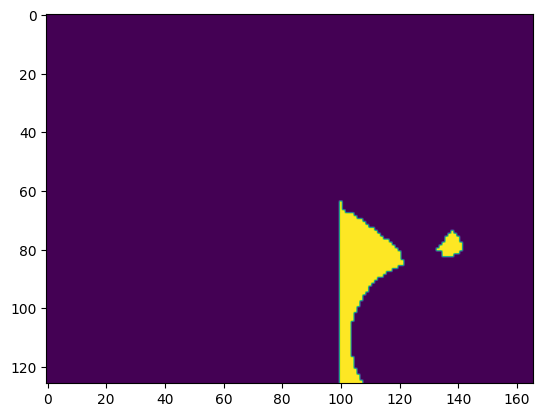

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

output = xr.open_dataset(outputfile_name)
output = output['output_catboost'].to_numpy().squeeze()
plt.imshow(output)

output.shape


In [3]:
from datetime import datetime

current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%Y_%m_%d_%H_%M_%S")
outputfile_name = str(formatted_datetime) + '_output_presto.nc'

presto_list = ["presto_" + str(i) for i in range(1, 129)]


udf = openeo.UDF.from_file("udf_presto.py")

prediction = input_cube.apply_neighborhood(
    process=udf,
    size=[
        {"dimension": "x", "value": 100, "unit": "px"},
        {"dimension": "y", "value": 100, "unit": "px"},
    ],
    overlap=[
        {"dimension": "x", "value": 0, "unit": "px"},
        {"dimension": "y", "value": 0, "unit": "px"},
    ],
)

prediction = prediction.rename_labels(dimension="bands",target= presto_list)

prediction.execute_batch(outputfile = outputfile_name,
                        description='world cereal inference',
                        job_options={'driver-memory': '4g',
                                    'executor-memoryOverhead':'8g'} )

0:00:00 Job 'j-24051411052f466b911c92ea2d1e7b20': send 'start'
0:00:29 Job 'j-24051411052f466b911c92ea2d1e7b20': created (progress 0%)
0:00:35 Job 'j-24051411052f466b911c92ea2d1e7b20': created (progress 0%)
0:00:44 Job 'j-24051411052f466b911c92ea2d1e7b20': created (progress 0%)
0:00:53 Job 'j-24051411052f466b911c92ea2d1e7b20': created (progress 0%)
0:01:11 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progress N/A)
0:01:28 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progress N/A)
0:01:44 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progress N/A)
0:02:15 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progress N/A)
0:02:43 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progress N/A)
0:03:24 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progress N/A)
0:04:03 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progress N/A)
0:04:54 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progress N/A)
0:05:56 Job 'j-24051411052f466b911c92ea2d1e7b20': running (progre

<BatchJob job_id='j-24051411052f466b911c92ea2d1e7b20'>

### Check reference

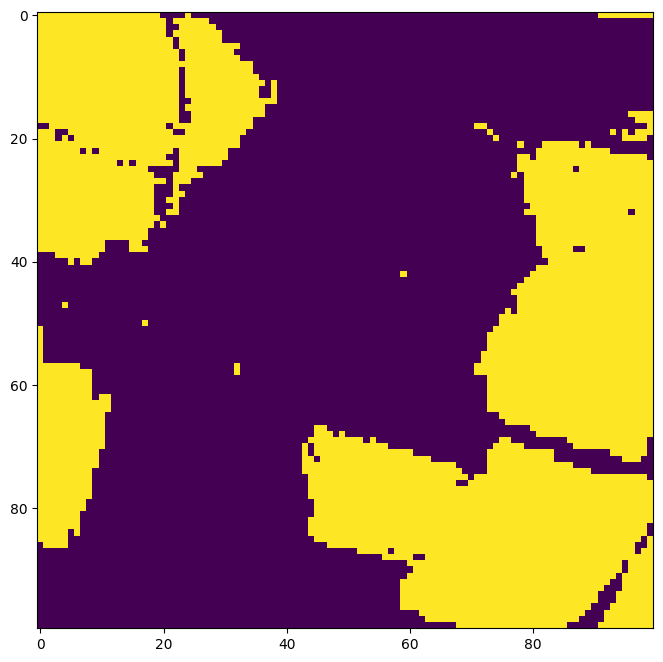